In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc, ndimage
from scipy.fft import dctn, idctn


# **Imaginea cu care lucrăm**

Vom folosi o imagine din setul de date oferit implicit de către scipy.

<ipython-input-2-75543c22557e>:1: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  X = misc.ascent()


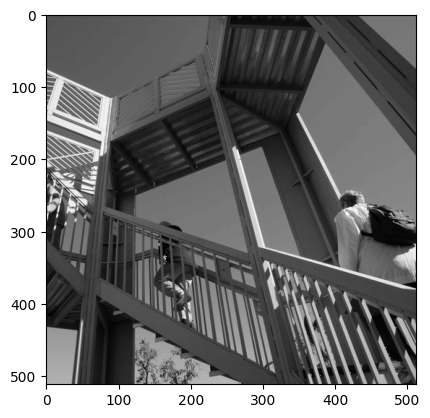

In [2]:
X = misc.ascent()
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# **Transformata DCT a unei imagini**

Transformata DCT se extinde la mai multe dimensiuni similar cu transformata DFT. Pentru un semnal bidimensional, precum o imagine, DCT-II devine:

**Ym1,m2=∑n1=0N1−1∑n2=0N2−1xn1,n2cos[πN1m1(n1+12)]cos[πN2m2(n2+12)]**

-unde n1 și n2sunt pozițile pixelilor pe orizontală, respectiv, pe verticală

-bin-urile rezultate corespund pozițiilor pixelilor

-spectrul este în continuare simetric și par

-proprietățile transformatei DCT-II sunt respectate și în cazul celei 2D

În Python avem rutina scipy.fft.dct pentru 1D și scipy.fft.dctn pentru generalizarea la semnale n-dimensionale. Dimensiunea este determinată automat după forma semnalului; tipul DCT poate fi specificat prin atributul type (implicit II).

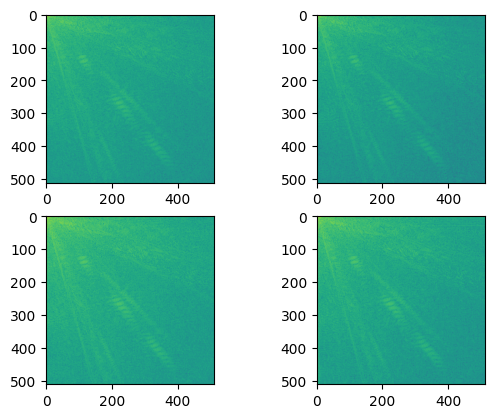

In [3]:
Y1 = dctn(X, type=1)
Y2 = dctn(X, type=2)
Y3 = dctn(X, type=3)
Y4 = dctn(X, type=4)
freq_db_1 = 20*np.log10(abs(Y1))
freq_db_2 = 20*np.log10(abs(Y2))
freq_db_3 = 20*np.log10(abs(Y3))
freq_db_4 = 20*np.log10(abs(Y4))

plt.subplot(221).imshow(freq_db_1)
plt.subplot(222).imshow(freq_db_2)
plt.subplot(223).imshow(freq_db_3)
plt.subplot(224).imshow(freq_db_4)
plt.show()


# **Compactarea energiei. Compresie.**

Putem profita de proprietatea compresiei energiei prin anularea frecvențelor DCT începând cu bin-ul k după care aplicăm transformata DCT inversă (similar cu tema anterioară):


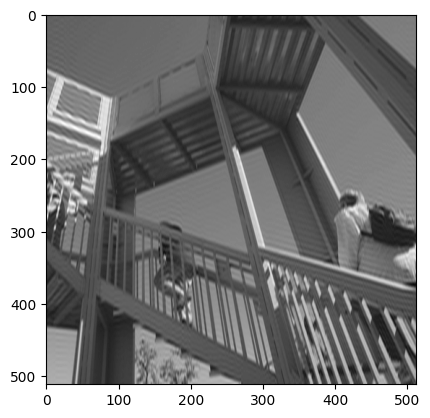

In [4]:
k = 120

Y_ziped = Y2.copy()
Y_ziped[k:] = 0
X_ziped = idctn(Y_ziped)

plt.imshow(X_ziped, cmap=plt.cm.gray)
plt.show()

# **JPEG**

Algoritmul de compresie JPEG are patru etape:

1. transformarea imaginii din pixeli RGB în Y'CbCr

2. aplicarea 2D-DCT pe blocuri disincte de 8x8 pixeli din imagine
    
3. cuantizarea în frecvență cu Q dat de standardul JPEG

4. opțional compresia rezultatului cu coduri Huffman

Unde matricea JPEG de cuantizare Q este:

Q=⎡⎣⎢⎢⎢⎢⎢⎢⎢⎢⎢⎢⎢⎢⎢⎢1612141418244972111213172235649210141622375578951619242956648798242640516881103112402857871091041211005160698010311312010361555662779210199⎤⎦⎥⎥⎥⎥⎥⎥⎥⎥⎥⎥⎥⎥⎥⎥

Imaginea noastră de test este monocromă, deci nu necesită pasul 1, dar putem efectua o operație de down-sampling în preprocesare precum am prezentat la curs.

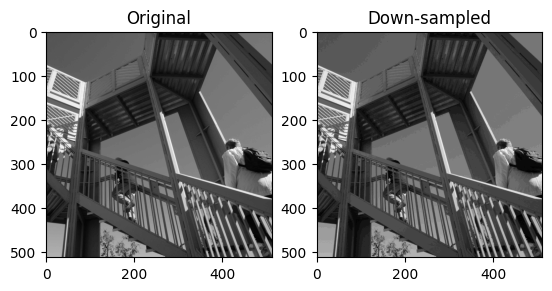

In [5]:
Q_down = 10

X_jpeg = X.copy()
X_jpeg = Q_down*np.round(X_jpeg/Q_down);

plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(X_jpeg, cmap=plt.cm.gray)
plt.title('Down-sampled')
plt.show()

Pentru fiecare bloc de 8×8 aplică DCT și cuantizare.

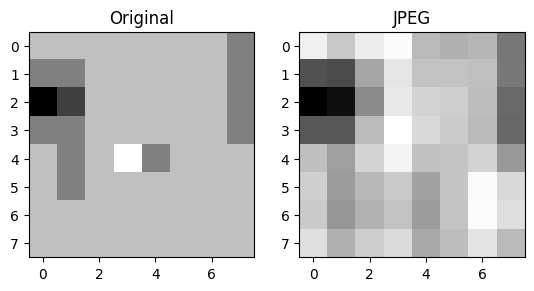

Componente în frecvență:64
Componente în frecvență după cuantizare: 14


In [6]:
Q_jpeg = [[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]]

# Encoding
x = X[:8, :8]
y = dctn(x)
y_jpeg = Q_jpeg*np.round(y/Q_jpeg)

# Decoding
x_jpeg = idctn(y_jpeg)

# Results
y_nnz = np.count_nonzero(y)
y_jpeg_nnz = np.count_nonzero(y_jpeg)

plt.subplot(121).imshow(x, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(x_jpeg, cmap=plt.cm.gray)
plt.title('JPEG')
plt.show()

print('Componente în frecvență:' + str(y_nnz) +
      '\nComponente în frecvență după cuantizare: ' + str(y_jpeg_nnz))

# **Rezolvarea cerintelor**

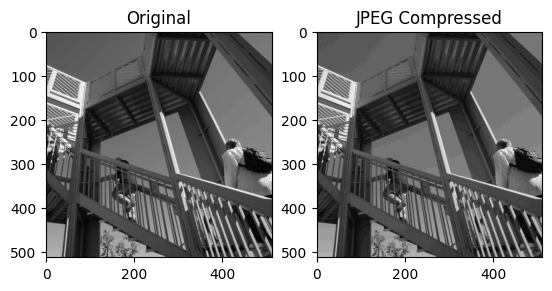

In [7]:
"""1."""

# Dimensiunile imaginii
height, width = X.shape

# Preprocesare: Down-sampling cu factorul Q_down
Q_down = 10
X_jpeg = Q_down * np.round(X / Q_down)

# Matricea de cuantizare JPEG standard
Q_jpeg = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                   [12, 12, 14, 19, 26, 28, 60, 55],
                   [14, 13, 16, 24, 40, 57, 69, 56],
                   [14, 17, 22, 29, 51, 87, 80, 62],
                   [18, 22, 37, 56, 68, 109, 103, 77],
                   [24, 35, 55, 64, 81, 104, 113, 92],
                   [49, 64, 78, 87, 103, 121, 120, 101],
                   [72, 92, 95, 98, 112, 100, 103, 99]])

# Creăm o matrice pentru a stoca imaginea comprimată
X_jpeg_compressed = np.zeros_like(X)

# Procesăm fiecare bloc de 8x8 din imagine
for i in range(0, height, 8):
    for j in range(0, width, 8):
        # Selectăm blocul curent
        block = X_jpeg[i:i+8, j:j+8]

        # Aplicăm DCT pe bloc
        dct_block = dctn(block)

        # Cuantizăm blocul DCT
        quantized_block = Q_jpeg * np.round(dct_block / Q_jpeg)

        # Decodăm blocul cuantizat (DCT invers)
        decompressed_block = idctn(quantized_block)

        # Salvăm blocul decomprimat în matricea imaginii
        X_jpeg_compressed[i:i+8, j:j+8] = decompressed_block

# Afisam imaginea originală și cea comprimată JPEG
plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(X_jpeg_compressed, cmap=plt.cm.gray)
plt.title('JPEG Compressed')
plt.show()

**2.**

In [8]:
from skimage import color

<ipython-input-9-a5ef81b6011b>:2: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  X_color = misc.face()


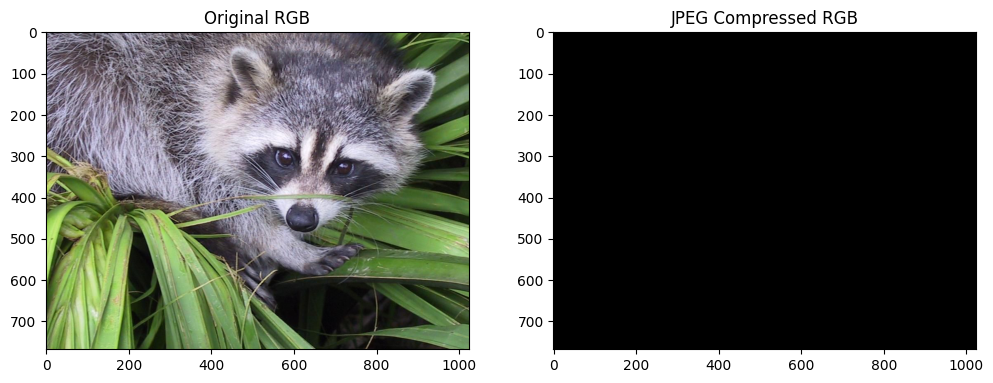

In [9]:
# Incarcam imaginea color din setul de date scipy
X_color = misc.face()

# Transformam imaginea din RGB in YCbCr
X_ycbcr = color.rgb2ycbcr(X_color)

# Preprocesare: Down-sampling cu factorul Q_down
Q_down = 10
X_ycbcr_down = Q_down * np.round(X_ycbcr / Q_down)

# Matricea de cuantizare JPEG standard
Q_jpeg = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                   [12, 12, 14, 19, 26, 28, 60, 55],
                   [14, 13, 16, 24, 40, 57, 69, 56],
                   [14, 17, 22, 29, 51, 87, 80, 62],
                   [18, 22, 37, 56, 68, 109, 103, 77],
                   [24, 35, 55, 64, 81, 104, 113, 92],
                   [49, 64, 78, 87, 103, 121, 120, 101],
                   [72, 92, 95, 98, 112, 100, 103, 99]])

# Aplicăm algoritmul JPEG pe fiecare canal Y, Cb, Cr separat
X_jpeg_ycbcr_compressed = np.zeros_like(X_ycbcr_down)

# Procesăm fiecare bloc de 8x8 din fiecare canal
for channel in range(3):
    height, width = X_ycbcr_down.shape[:2]
    for i in range(0, height, 8):
        for j in range(0, width, 8):
            # Selectăm blocul curent din canalul curent
            block = X_ycbcr_down[i:i+8, j:j+8, channel]

            # Aplicăm DCT pe bloc
            dct_block = dctn(block)

            # Cuantizăm blocul DCT
            quantized_block = Q_jpeg * np.round(dct_block / Q_jpeg)

            # Decodăm blocul cuantizat (DCT invers)
            decompressed_block = idctn(quantized_block)

            # Salvăm blocul decomprimat în matricea imaginii
            X_jpeg_ycbcr_compressed[i:i+8, j:j+8, channel] = decompressed_block

# Transformam imaginea comprimată din YCbCr înapoi în RGB
X_jpeg_rgb_compressed = color.ycbcr2rgb(X_jpeg_ycbcr_compressed.clip(0, 255))

# Afisam imaginea originală și cea comprimată JPEG
plt.figure(figsize=(12, 6))
plt.subplot(121).imshow(X_color)
plt.title('Original RGB')
plt.subplot(122).imshow(X_jpeg_rgb_compressed.clip(0, 255).astype(np.uint8))
plt.title('JPEG Compressed RGB')
plt.show()

**3.**

In [10]:
from sklearn.metrics import mean_squared_error

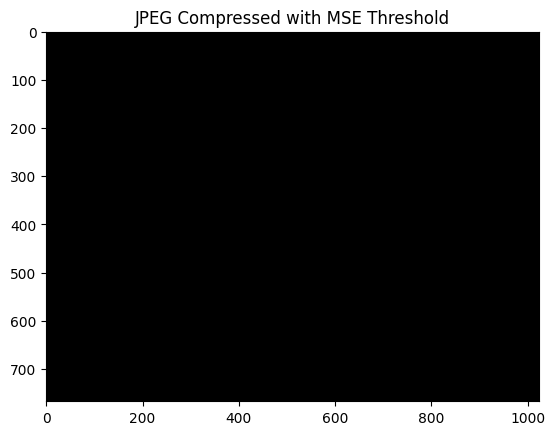

MSE: 107.6765602959527, Down-sampling Factor: 1


In [11]:
#Functie pentru calculul MSE (Mean Squared Error) pentru imagini RGB
def calculate_mse_rgb(image1, image2):
    # Asiguram ca imaginile au aceleasi dimensiuni si sunt in format uint8
    image1 = image1.clip(0, 255).astype(np.uint8)
    image2 = image2.clip(0, 255).astype(np.uint8)

    # Calculam MSE pentru fiecare canal de culoare si returnam media acestora
    mse_r = mean_squared_error(image1[:, :, 0], image2[:, :, 0])
    mse_g = mean_squared_error(image1[:, :, 1], image2[:, :, 1])
    mse_b = mean_squared_error(image1[:, :, 2], image2[:, :, 2])

    return (mse_r + mse_g + mse_b) / 3

# Pragul MSE impus de utilizator
mse_threshold = 500

# Variabila pentru stocarea valorii MSE curente
current_mse = float('inf')

# Variabila pentru stocarea factorului de down-sampling curent
current_down_factor = 1

# Procesam imaginea cu factori de down-sampling incremental pana cand atingem pragul MSE
while current_mse > mse_threshold and current_down_factor <= 255:
    # Aplicam down-sampling cu factorul curent
    X_ycbcr_down = current_down_factor * np.round(X_ycbcr / current_down_factor)

    # Aplicam algoritmul JPEG pe fiecare canal Y, Cb, Cr separat
    X_jpeg_ycbcr_compressed = np.zeros_like(X_ycbcr_down)

    # Procesam fiecare bloc de 8x8 din fiecare canal
    for channel in range(3):
        height, width = X_ycbcr_down.shape[:2]
        for i in range(0, height, 8):
            for j in range(0, width, 8):
                # Selectam blocul curent din canalul curent
                block = X_ycbcr_down[i:i+8, j:j+8, channel]

                # Aplicam DCT pe bloc
                dct_block = dctn(block)

                # Cuantizam blocul DCT
                quantized_block = Q_jpeg * np.round(dct_block / Q_jpeg)

                # Decodam blocul cuantizat (DCT invers)
                decompressed_block = idctn(quantized_block)

                # Salvam blocul decomprimat in matricea imaginii
                X_jpeg_ycbcr_compressed[i:i+8, j:j+8, channel] = decompressed_block

    # Transformam imaginea comprimata din YCbCr inapoi in RGB
    X_jpeg_rgb_compressed = color.ycbcr2rgb(X_jpeg_ycbcr_compressed.clip(0, 255))

    # Calculam MSE
    current_mse = calculate_mse_rgb(X_color, X_jpeg_rgb_compressed)

    # Incrementam factorul de down-sampling
    current_down_factor += 1

# Afisam imaginea comprimata si informatii despre compresie
plt.imshow(X_jpeg_rgb_compressed.clip(0, 255).astype(np.uint8))
plt.title('JPEG Compressed with MSE Threshold')
plt.show()

# Afisam valorile MSE si factorul de down-sampling
print(f"MSE: {current_mse}, Down-sampling Factor: {current_down_factor - 1}")

**4.**

In [1]:
import cv2

In [18]:
# Functie pentru calculul MSE (Mean Squared Error) pentru imagini RGB
def calculate_mse_rgb(image1, image2):
    image1 = image1.clip(0, 255).astype(np.uint8)
    image2 = image2.clip(0, 255).astype(np.uint8)
    mse_r = mean_squared_error(image1[:, :, 0], image2[:, :, 0])
    mse_g = mean_squared_error(image1[:, :, 1], image2[:, :, 1])
    mse_b = mean_squared_error(image1[:, :, 2], image2[:, :, 2])
    return (mse_r + mse_g + mse_b) / 3

# Functie pentru comprimarea unui cadru folosind JPEG
def compress_frame_jpeg(frame, Q_jpeg):
    # Transforma frame-ul in YCbCr
    frame_ycbcr = color.rgb2ycbcr(frame)
    compressed_ycbcr = np.zeros_like(frame_ycbcr)

    # Aplica compresia JPEG pe fiecare canal
    for channel in range(3):
        height, width = frame_ycbcr.shape[:2]
        for i in range(0, height, 8):
            for j in range(0, width, 8):
                block = frame_ycbcr[i:i+8, j:j+8, channel]
                dct_block = dctn(block)
                quantized_block = Q_jpeg * np.round(dct_block / Q_jpeg)
                decompressed_block = idctn(quantized_block)
                compressed_ycbcr[i:i+8, j:j+8, channel] = decompressed_block

    # Converteste inapoi in RGB
    compressed_frame = color.ycbcr2rgb(compressed_ycbcr.clip(0, 255))
    return compressed_frame

# Deschide videoclipul sursa
video = cv2.VideoCapture('calea_spre_videoclip.mp4')

# Obține lățimea și înălțimea cadrelor din videoclipul sursă
largime = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
inaltime = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Creaza un obiect VideoWriter pentru a salva videoclipul comprimat
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('calea_spre_videoclip_comprimat.mp4', fourcc, 30.0, (largime, inaltime))

# Matricea de cuantizare JPEG standard
Q_jpeg = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                   [12, 12, 14, 19, 26, 28, 60, 55],
                   [14, 13, 16, 24, 40, 57, 69, 56],
                   [14, 17, 22, 29, 51, 87, 80, 62],
                   [18, 22, 37, 56, 68, 109, 103, 77],
                   [24, 35, 55, 64, 81, 104, 113, 92],
                   [49, 64, 78, 87, 103, 121, 120, 101],
                   [72, 92, 95, 98, 112, 100, 103, 99]])

# Proceseaza fiecare cadru al videoclipului
while True:
    ret, frame = video.read()
    if not ret:
        break

    # Comprima frame-ul folosind JPEG
    compressed_frame = compress_frame_jpeg(frame, Q_jpeg)

    # Scrie frame-ul comprimat in videoclipul de iesire
    out.write(compressed_frame.astype(np.uint8))

# Elibereaza resursele
video.release()
out.release()